In [8]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [11]:
dir_source = "test_sample/" # path to the source image
dir_saved = "test_sample/saved/" # path to the folder to save the segmentaion
file_name = "0_0.png"
output_size = (58,58) # The output size of each chinense character
min_gray = 200
threshold = 2 # To determine if this row(or column) contains parts of the characters
min_gap = 4 # The minimum px between two character. Means at least min_gap of blank columns(or rows) needs to be detected for the program to cut a character
size_flex = 0.7

In [12]:
image = cv2.imread(dir_source + file_name)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)
print(image)

(58, 1161)
[[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 ..., 
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]]


In [13]:
def scan_image_horizontal(image, min_gray):
    # Scan the image column by column to count how many dot in one column
    # Save all the amount in an array "horizontal"
    height = image.shape[0]
    width = image.shape[1]
    horizontal = np.zeros(width, dtype = int)
    for x in range(width): # From left to right
        count = 0 # The amount of dots of each column
        for y in range(height): # From top to bottom
            if (image[y][x] < min_gray) :
                count = count + 1
        horizontal[x] = count
#     print(horizontal)
    return horizontal

def scan_image_vertical(image, min_gray):
    # Scan the image row by row to count how many dot in one row
    # Save all the amount in an array "vertical"
    height = image.shape[0]
    width = image.shape[1]
    vertical = np.zeros(height, dtype = int)
    for y in range(height): # From top to bottom
        count = 0 # The amount of dots of each row
        for x in range(width): # From left to right
            if (image[y][x] < min_gray) :
                count = count + 1
        vertical[y] = count
    # print(vertical)
    return vertical

In [18]:
def get_sentence_height(vertical):
    start_point = None
    end_point = None
    for i, y in enumerate(vertical):
        if y > 1 and start_point is None:
            start_point = i
        elif y > 1 and start_point is not None:
            pass
        elif y <= 1 and start_point is not None and end_point is None:
            end_point = i
        else:
            pass
    if end_point == None:
        end_point = len(vertical) - 1
    return end_point - start_point + 1

In [19]:
def plot_peaks(array, direction):
    # Draw the plot of the scanning result
    x_axle = np.linspace(0, len(array), len(array))
    plt.plot(x_axle, array)
    plt.title('Dots Count')
    plt.xlabel(direction)
    plt.ylabel('number of dots')

    plt.show()

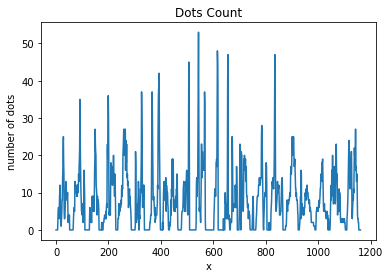

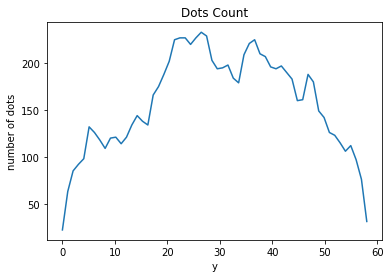

The height of these characters is about: 58 pixel


In [20]:
horizontal = scan_image_horizontal(image, min_gray)
plot_peaks(horizontal, 'x')
vertical = scan_image_vertical(image, min_gray)
plot_peaks(vertical, 'y')
char_height = get_sentence_height(vertical)
print('The height of these characters is about: ' + str(char_height) + ' pixel')

In [24]:
def segmentation(columns_sum, threshold, min_size, min_gap):
    # Cut the sentence into characters
    # Because chinese characters are basically rectangle,
    # So we can cut it according to the height of a sentence.
    start_i = None
    end_i = None
    parts = []
    blank_count = 0
    for i, val in enumerate(columns_sum):
        if val > threshold and start_i is None:
            if i > 4: # Add blank around the character
                start_i = i - 4
            else:
                start_i = 0
        elif val > threshold and start_i is not None:
            pass
        elif val < threshold and start_i is not None:
            if i - start_i >= min_size:
                if i > len(columns_sum) - 6: # Add blank around the character
                    end_i = len(columns_sum) - 1
                else:
                    end_i = i + 4
                # print(end_i - start_i)
                parts.append((start_i, end_i))
                start_i = None
                end_i = None
                blank_count = 0
            else:
                pass
        elif val < threshold and start_i is None:
            pass
    if (start_i is not None):
        end_i = len(columns_sum) - 1
        parts.append((start_i, end_i))
    return parts

print(char_height)
horizontal_seg = segmentation(horizontal, 2, char_height * size_flex, min_gap)
print(horizontal_seg)
print(len(horizontal_seg))

vertical_seg = segmentation(vertical, 2, char_height * size_flex, min_gap)
print(vertical_seg)


58
[(3, 56), (63, 114), (124, 169), (179, 232), (232, 291), (299, 344), (356, 402), (404, 468), (475, 520), (531, 576), (598, 643), (640, 695), (694, 743), (745, 794), (788, 869), (875, 927), (926, 986), (988, 1041), (1034, 1106), (1105, 1158)]
20
[(0, 57)]


In [30]:
def cutImage(img, vertical_ranges, min_size, output_size, dir_saved):
        results = []
        for y, vertical_index_pair in enumerate(vertical_ranges):
            horizontal = scan_image_horizontal(img[vertical_index_pair[0] : vertical_index_pair[1], : ], min_gray)
            horizontal_ranges = segmentation(horizontal, 2, min_size, min_gap)
            for x, horizontal_index_pair in enumerate(horizontal_ranges):
                cutted_char = img[vertical_index_pair[0]    : vertical_index_pair[1], 
                                  horizontal_index_pair[0] : horizontal_index_pair[1]]
                resized_cutted_char = cv2.resize(cutted_char, output_size)
                results.append(resized_cutted_char)
                cv2.imwrite(dir_saved + "row" + str(y) + "pos" + str(x) + ".jpg", resized_cutted_char)
                print("row" + str(y) + "pos" + str(x) + "saved!")
        return results
        
        
results = cutImage(image, vertical_seg, char_height * size_flex, output_size, dir_saved)
output = np.array(result)
print(output.shape)

row0pos0saved!
row0pos1saved!
row0pos2saved!
row0pos3saved!
row0pos4saved!
row0pos5saved!
row0pos6saved!
row0pos7saved!
row0pos8saved!
row0pos9saved!
row0pos10saved!
row0pos11saved!
row0pos12saved!
row0pos13saved!
row0pos14saved!
row0pos15saved!
row0pos16saved!
row0pos17saved!
row0pos18saved!
row0pos19saved!
